In [1]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn
import statsmodels.formula.api as sm

In [24]:
#Load data
data = pd.read_csv(r"F:\Analytics\IMS\Linear\LR_11.csv")

In [25]:
data.head()

,House Price,Square Feet,City
0,245,1400,N
1,312,1600,Y
2,279,1700,N
3,308,1875,Y
4,199,1100,N


In [26]:

print("Data shape : ",data.shape)
print(data.head())
print(data.dtypes)


Data shape :  (10, 3)
   House Price  Square Feet City
0          245         1400    N
1          312         1600    Y
2          279         1700    N
3          308         1875    Y
4          199         1100    N
House Price     int64
Square Feet     int64
City           object
dtype: object


In [27]:
#Get all categorical variables and create dummies
obj = (data.dtypes == np.object)
obj

House Price    False
Square Feet    False
City            True
dtype: bool

In [28]:
print(obj)
dummydf = pd.DataFrame()   

for i in data.columns[obj]:
    dummy = pd.get_dummies(data[i], drop_first=True)
    dummydf = pd.concat([dummydf, dummy], axis=1)
print(dummydf)

House Price    False
Square Feet    False
City            True
dtype: bool
   Y
0  0
1  1
2  0
3  1
4  0
5  0
6  1
7  1
8  1
9  0


In [23]:
#df1=pd.get_dummies(data['Gender'])
#df2=pd.get_dummies(data['City'])
#df1=pd.concat([df1,df2],axis=1)
#df1

,F,M,O,N,Y
0,0,1,0,1,0
1,1,0,0,0,1
2,0,0,1,1,0
3,0,1,0,0,1
4,0,1,0,1,0
5,1,0,0,1,0
6,1,0,0,0,1
7,1,0,0,0,1
8,0,1,0,0,1
9,0,1,0,1,0


In [29]:
#Merge the dummy and dataset
data1 = data
data1 = pd.concat([data1,dummydf], axis=1)
print("head \n",data1.head())

head 
    House Price  Square Feet City  Y
0          245         1400    N  0
1          312         1600    Y  1
2          279         1700    N  0
3          308         1875    Y  1
4          199         1100    N  0


In [30]:
obj1 = data1.dtypes == np.object
obj1

House Price    False
Square Feet    False
City            True
Y              False
dtype: bool

In [31]:

obj1 = data1.dtypes == np.object
print(obj1)
data1 = data1.drop(data1.columns[obj1], axis=1)
print("head after removal \n",data1.head())

House Price    False
Square Feet    False
City            True
Y              False
dtype: bool
head after removal 
    House Price  Square Feet  Y
0          245         1400  0
1          312         1600  1
2          279         1700  0
3          308         1875  1
4          199         1100  0


In [32]:

#Declare the dependent variable and create your independent and dependent datasets
dep = 'House Price'
X = data1.drop(dep, axis=1)
Y = data1[dep]
print(X)
print(Y)


   Square Feet  Y
0         1400  0
1         1600  1
2         1700  0
3         1875  1
4         1100  0
5         1550  0
6         2350  1
7         2450  1
8         1425  1
9         1700  0
0    245
1    312
2    279
3    308
4    199
5    219
6    405
7    324
8    319
9    255
Name: House Price, dtype: int64


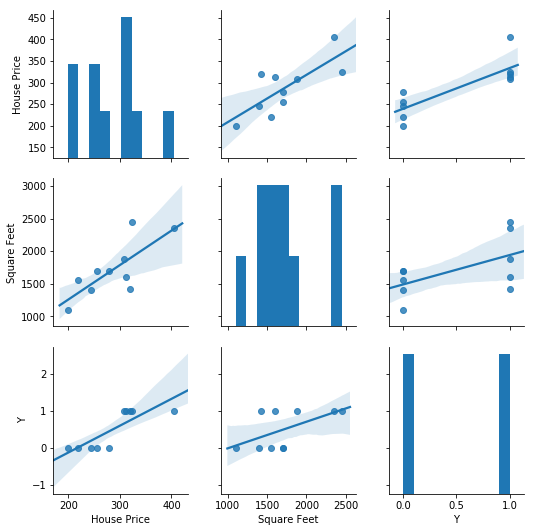

In [33]:
#Scatter plots
seaborn.pairplot(data1, kind='reg')


In [38]:
import sklearn.model_selection
#Split into train and test
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.30, random_state=5)

In [43]:
import statsmodels.formula.api as sm

In [45]:
#Run model
lm = sm.OLS( Y_train, X_train ).fit()

In [46]:
y_pred=lm.predict(X_test)

In [47]:
y_pred

9    257.269441
5    234.569196
2    257.269441
dtype: float64

In [50]:
Y_train

4    199
7    324
1    312
0    245
8    319
6    405
3    308
Name: House Price, dtype: int64

In [49]:
#to check residual behaviour 
pred_train = lm.predict(X_train)
pred_train

4    166.468462
7    410.780832
1    282.146112
0    211.868951
8    255.662493
6    395.647336
3    323.763227
dtype: float64

In [51]:
err_train = pred_train - Y_train
err_train

4   -32.531538
7    86.780832
1   -29.853888
0   -33.131049
8   -63.337507
6    -9.352664
3    15.763227
dtype: float64

In [53]:
#to check residual behaviour 
pred_train = lm.predict(X_train)
err_train = pred_train - Y_train
#print(err_train)
#Predict
pred_test = lm.predict(X_test)
err_test = pred_test - Y_test
print(err_test)

9     2.269441
5    15.569196
2   -21.730559
dtype: float64


Text(0.5, 1.0, 'Main')

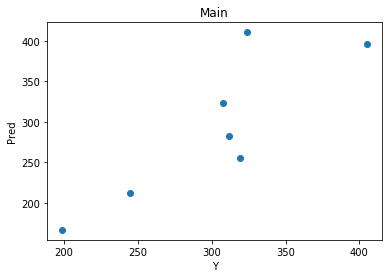

In [55]:
#Actual vs predicted plot
plt.scatter(Y_train, pred_train)
plt.xlabel('Y')
plt.ylabel('Pred')
plt.title('Main')

In [56]:
#Root Mean sq error
rmse = np.sqrt(np.mean((err_test))**2)
rmse

1.2973074750517053

Text(0, 0.5, 'Residuals')

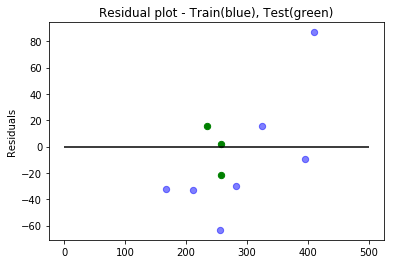

In [57]:
#Residual plots
plt.scatter(pred_train, err_train, c="b", s=40, alpha=0.5)
plt.scatter(pred_test,err_test, c="g", s=40)
plt.hlines(y=0, xmin=0, xmax=500)
plt.title('Residual plot - Train(blue), Test(green)')
plt.ylabel('Residuals')

             Square Feet         Y
Square Feet     1.000000  0.567578
Y               0.567578  1.000000


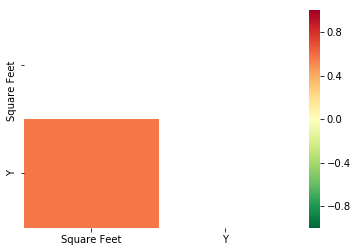

In [14]:
#multicollinearity
#cor=X.corr(method='spearman')
cor=X.corr(method='pearson')
print(cor)
#Create a mask to diplay only lower triangle of the matrix
mask=np.zeros_like(cor)
mask[np.triu_indices_from(mask)]=True
seaborn.heatmap(cor,vmax=1,vmin=-1,cmap='RdYlGn_r',mask=mask)

In [15]:
data.head()

,House Price,Square Feet,City
0,245,1400,N
1,312,1600,Y
2,279,1700,N
3,308,1875,Y
4,199,1100,N


E:\anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


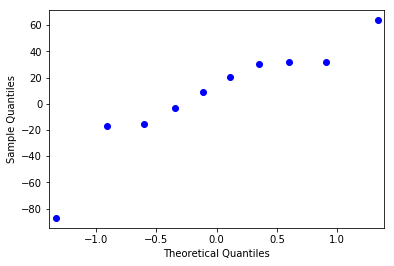

0    32.100919
1    30.104063
2    20.479687
3   -15.715400
4    31.722150
5   -16.709697
6     9.050983
7   -87.156094
8    63.716448
9    -3.520313
dtype: float64


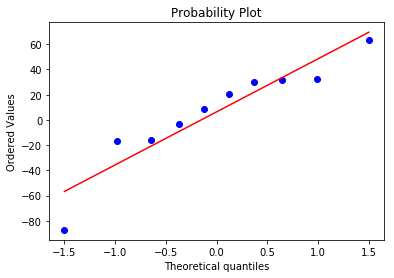

In [16]:
#Normal distribution
import statsmodels.api as sma
lm = sm.OLS(Y,X).fit()
datares = pd.concat([data, pd.Series(lm.resid, name = 'resid'), pd.Series(lm.predict(), name = "predict")], axis = 1)

sma.qqplot(datares.resid)
plt.show()
print(lm.resid)

import scipy.stats as scipystats
import pylab
scipystats.probplot(datares.resid, dist="norm", plot=pylab)
pylab.show()

In [18]:
#Kilmogorov-Smirnov test
resid = datares.resid
norm_resid = (datares.resid - np.mean(datares.resid)) / np.std(datares.resid)
print(scipystats.kstest(norm_resid, 'norm'))
#In the Kilmogorov-Smirnov test -> p-value is large so we can't reject that residual are normally distributed

KstestResult(statistic=0.17679635696459076, pvalue=0.91340913922123124)


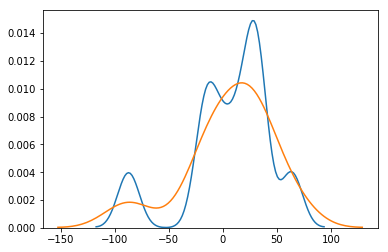

In [19]:
import seaborn as sns
sns.kdeplot(np.array(datares.resid), bw=10)
sns.distplot(np.array(datares.resid), hist=False)

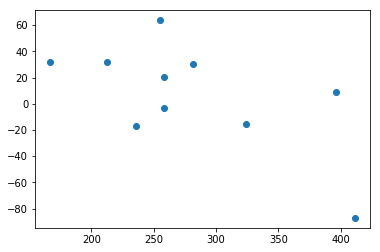

In [20]:
#Homoscedasticity 
resid = lm.resid
plt.scatter(lm.predict(), resid)

In [58]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [59]:
lm.fit(X_train, Y_train )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
lm.predict([[2000,0]])

array([263.77541509])

In [64]:
y_pred

array([247.06524905, 238.71016604, 247.06524905])

In [65]:
Y_test

9    255
5    219
2    279
Name: House Price, dtype: int64

In [24]:
X_train.columns

Index(['Square Feet', 'Y'], dtype='object')

In [25]:
lm.coef_

array([  0.06534609,  57.31311352])